In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
fruits = pd.read_table("fruit_data_with_colors.txt")

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
#create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [6]:
#checking how many unique fruit names are present in the dataset
fruits['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

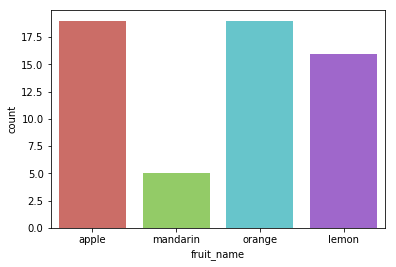

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x="fruit_name",data=fruits,palette="hls")
plt.show()
plt.savefig("count_plot")

In [8]:
apple_data=fruits[fruits['fruit_name']=='apple']
orange_data=fruits[fruits['fruit_name']=='orange']
lemon_data=fruits[fruits['fruit_name']=='lemon']
mandarin_data=fruits[fruits['fruit_name']=='mandarin']

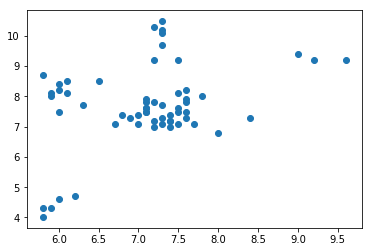

In [10]:
plt.scatter(fruits['width'],fruits['height']);

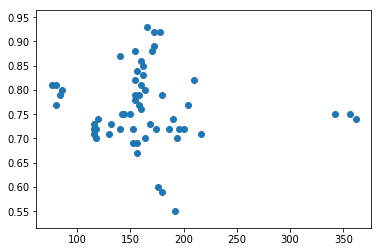

In [11]:
plt.scatter(fruits['mass'],fruits['color_score']);

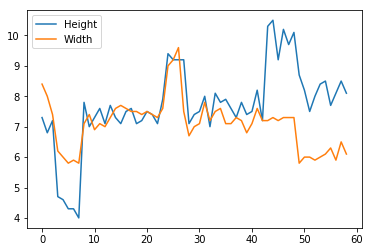

In [12]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X=fruits[['mass','width','height']]
Y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [16]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
mass,44.0,159.090909,53.316876,76.0,127.500,157.0,172.50,356.0
width,44.0,7.038636,0.835886,5.8,6.175,7.2,7.50,9.2
height,44.0,7.643182,1.370350,4.0,7.200,7.6,8.25,10.5


In [17]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
mass,15.0,174.933333,60.075508,84.0,146.00,166.0,185.00,362.0
width,15.0,7.300000,0.751190,6.0,7.10,7.2,7.45,9.6
height,15.0,7.840000,1.369463,4.6,7.25,7.6,8.15,10.3


In [18]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
knn.score(X_test,y_test)

0.5333333333333333

In [20]:
#parameters of following function are mass,width and height
#example1
prediction1=knn.predict([['100','6.3','8']])
predct[prediction1[0]]

'lemon'

In [21]:
y_pred = knn.predict(X_test)

In [22]:
y_pred

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4], dtype=int64)

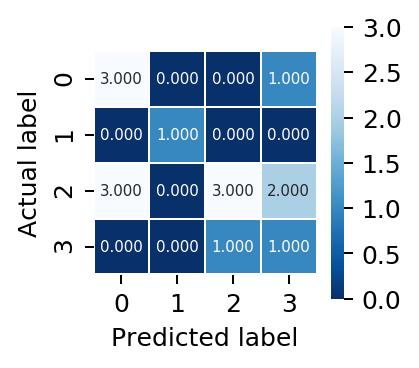

In [27]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_pred)

plt.figure(figsize=(2,2),dpi=180) #dpi param changes the size of figure
sns.heatmap(cm, annot=True,fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',annot_kws={"size": 6});
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [31]:
#Tuning

knn_params = {"n_neighbors":np.arange(1,36)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print("En iyi skor:"+str(knn_cv.best_score_))
print("En iyi parametre:"+str(knn_cv.best_params_))

En iyi skor:0.75
En iyi parametre:{'n_neighbors': 1}


In [33]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(X_train,y_train)

In [34]:
knn_tuned.score(X_test,y_test)

0.6